In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dot Product of 2 Vectors

$$
\begin{equation} \vec{a} \cdot \vec{b} =  
 \sum_{i=1}^n a_i b_i =
(a_{1} \cdot b_{1}) + (a_{2} \cdot b_{2}) \; + ... + \; (a_{n} \cdot b_{n})
\end{equation}
$$


In [2]:
a = [1, 2, 3]
b = [2, 3, 4]

dot_product = a[0]*b[0] + a[1]*b[1]+a[2]*b[2]
print(dot_product) #20

20


### Sum 2 Vectors

$$
\begin{equation} \vec{a} + \vec{b} =  
[a_{1} + b_{1}, a_{2} + b_{2},...,a_{n} + b_{n}]
\end{equation}
$$

In [3]:
a = [1, 2, 3]
b = [2, 3, 4]

vectors_sum = [a[0]+b[0], a[1]+b[1], a[2]+b[2]]
print(vectors_sum) # [3, 5, 7]

[3, 5, 7]


### A Single Neuron with NumPy

In [4]:
inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2
# sum of vector * vector + bias
outputs = np.dot(inputs, weights.T) + bias
print(outputs) # 4.8

4.8


### A Layer of Neurons with NumPy

In [5]:
inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.92, 0.25, -0.12],
    [-0.26, 0.8, -0.5, 1.0]])
biases = [2.0, 3.0, 0.5]
# sum(list of vectors * vector) + vector
layer_outputs = np.dot(inputs, weights.T) + biases
print(layer_outputs) # [4.8 2.11 2.84]
print(layer_outputs.shape) # (3,0)

[4.8  2.11 2.84]
(3,)


### Transposition for the Matrix Product

***Transposition*** simply modifies a matrix in a way that its **rows**
become **columns** and **columns** become **rows**:

$$
\begin{equation} \vec{a} \cdot \vec{b} = ab^T
\end{equation}
$$
#### Example 1
$$
\begin{equation} \vec{a} \cdot \vec{b} = 
 \begin{bmatrix} 1 & 2 & 3 \end{bmatrix} 
 \begin{bmatrix} 2 \\ 3 \\ 4 \end{bmatrix} = 
 \begin{bmatrix} 20 \end{bmatrix}
\end{equation}
$$

#### Example 2

$$
\begin{equation}
 \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}^T =
 \begin{bmatrix} 1 & 4 & 7 \\ 2 & 5 & 8 \\ 3 & 6 & 9 \end{bmatrix}
\end{equation}
$$

In [6]:
a = [1, 2, 3]
b = [3, 4, 5]

aVector = np.array([a]) # row vector
bVector = np.array([b]).T # make T -> column vector
print(aVector.shape) # (1,3)
print(bVector.shape) # (3,1)

print(np.dot(aVector, bVector)) # 26

(1, 3)
(3, 1)
[[26]]


### A Layer of Neurons & Batch of Data w/ NumPy

In [7]:
inputs = np.array([
    [1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]])
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

ouputs = np.dot(inputs, np.array(weights).T) + biases
print(ouputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [8]:
inputs = np.array([[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]])
weights1 = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases1 = [2, 3, 0.5]
weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_output = np.dot(inputs, np.array(weights1).T) + biases1
layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2
print(layer1_output)
print(layer2_output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [9]:
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

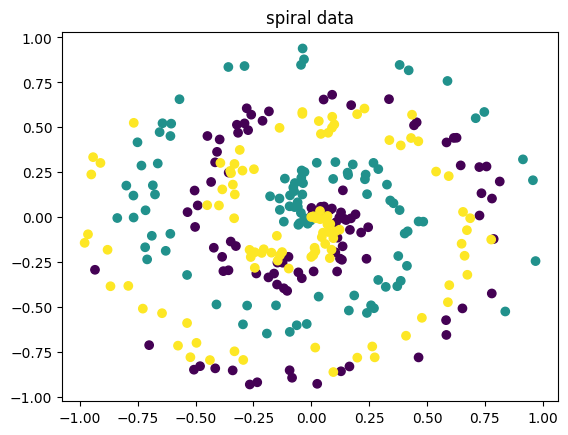

In [10]:
X, y = spiral_data(samples=100, classes=3)
plt.title('spiral data')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Dense Layer Class

In [11]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [12]:
# n_inputs = 2
# n_neurons = 4

# weights = 0.01 * np.random.randn(n_inputs, n_neurons)
# biases  = np.zeros((1, n_neurons))

# print(weights)
# print(biases)

X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
dense1.forward(X)

print(dense1.output[:6])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]
 [-9.66546431e-05 -6.26290333e-04 -4.16209630e-04]]


### The Linear Activation Function

A *linear function* is simply the equation of a line. It will appear as a straight line when graphed, where ```y=x``` and the output value equals the input.

\begin{equation*}
y = x
\end{equation*}

### The Sigmoid Activation Function

The output from the Sigmoid function, being in the range of 0 to 1.
The *Sigmoid function*, historically used in hidden layers, was eventually replaced by the **Rectified Linear Units** activation function (or *ReLU*)

\begin{equation*}
y = \frac{1}{(1+e^{-x})}
\end{equation*}

### The Rectified Linear Activation Function

The rectified linear activation function is simpler than the sigmoid. It’s quite literally y=x, clipped at 0 from the negative side. If x is less than or equal to 0, then y is 0 — otherwise, y is equal to x.

\begin{equation*}
 y = \left\{
    \begin{array}\\
        x & \mbox x > 0 \\
        0 & \mbox x \leq 0 \\
    \end{array}
\right.
\end{equation*}

*This simple yet powerful activation function is the most widely used activation function at the time of writing for various reasons — mainly speed and efficiency. While the **Sigmoid activation function** isn’t the most complicated, it’s still much more challenging to compute than the **ReLU activation function**. The **ReLU** is extremely close to being a linear activation function while remaining nonlinear, due to that bend after 0. This simple property is, however, very effective.*


### The Softmax Activation Function

\begin{align}
S_{i,j} = \frac{e^{z_{i,j}}}{\sum_{l=1}^L e^{z_{i,j}}}
\end{align}



In [13]:
#ReLU example
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = [max(0, i) for i in inputs]
print(inputs)
print(output)

[0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [14]:
#ReLU example NumPy
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)
print(inputs)
print(output)

[0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [15]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

X, y = spiral_data(samples=100, classes=3)
# 2 inputs, 3 neurones
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense1.forward(X)
activation1.forward(dense1.output)
print(activation1.output[:5])


[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3520580e-04 1.8173116e-05 0.0000000e+00]
 [2.3245417e-04 0.0000000e+00 0.0000000e+00]
 [3.8226307e-04 0.0000000e+00 0.0000000e+00]
 [5.7436468e-04 0.0000000e+00 0.0000000e+00]]


In [16]:
from math import e as E

layer_outputs = [4.8, 1.21, 2.385]
exp_values = [E ** output for output in layer_outputs]
# print(exp_values)
norm_base = sum(exp_values)
norm_values = [value / norm_base for value in exp_values]

print('Normalized exponentiated values:')
print(norm_values)
print('Sum of normalized values:', sum(norm_values))

Normalized exponentiated values:
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
Sum of normalized values: 0.9999999999999999


In [17]:
layer_outputs = [4.8, 1.21, 2.385]
exp_values = np.exp(layer_outputs)
print('exponentiated values:')
print(exp_values)
# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print('Normalized exponentiated values:')
print(norm_values)
print('Sum of normalized values:', sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
Normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
Sum of normalized values: 0.9999999999999999


In [18]:
# Get unnormalized probabilities
# exp_values = np.exp(inputs)
# # Normalize them for each sample
# probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

layer_outputs = np.array([[4.8, 1.21, 2.385],
                          [8.9, -1.81, 0.2],
                          [1.41, 1.051, 0.026]])
print(np.sum(layer_outputs))
print('Sum without axis')
print('This will be identical to the above since default is None:')
print(np.sum(layer_outputs, axis=None))

print('Another way to think of it w/ a matrix == axis 0: columns:') 
print(np.sum(layer_outputs, axis=0))

print('Sum axis 1, but keep the same dimensions as input:') 
print(np.sum(layer_outputs, axis=1, keepdims=True))

18.172
Sum without axis
This will be identical to the above since default is None:
18.172
Another way to think of it w/ a matrix == axis 0: columns:
[15.11   0.451  2.611]
Sum axis 1, but keep the same dimensions as input:
[[8.395]
 [7.29 ]
 [2.487]]


In [19]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(np.array(inputs) - np.max(inputs, axis=1, keepdims=True))
        # Normalize
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities;

print(np.exp(1))
print(np.exp(10))
print(np.exp(100))
print(np.exp(-np.inf), np.exp(0))

2.718281828459045
22026.465794806718
2.6881171418161356e+43
0.0 1.0


In [20]:
softmax = Activation_Softmax()
softmax.forward([[1,2,3]])
print(softmax.output)

softmax.forward([[-2,-1,0]])
print(softmax.output)

softmax.forward([[0.5,1,1.5]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]
[[0.09003057 0.24472847 0.66524096]]
[[0.18632372 0.30719589 0.50648039]]


In [21]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.33333343 0.3333333 ]
 [0.33333296 0.33333385 0.33333316]
 [0.33333233 0.33333507 0.33333266]
 [0.33333194 0.33333552 0.33333248]]


### Categorical Cross-Entropy Loss

$
L_{i} = - \sum_j y_{i,j}log(\hat{y}_{i,j})
$

Where $L_{i}$ denotes sample loss value, *i* is the i-th sample in the set, *j* is the label/output index, *y* denotes the target values, and $\hat{y}$ denotes the predicted values.
Once we start coding the solution, we’ll simplify it further to *-log(correct_class_confidence)*, the formula for which is:

$
\begin{align}
L_{i} = - log(\hat{y}_{i,k})
\end{align}
$
Where **k** is an index of 'true' probability.

```python
softmax_output = [0.7, 0.1, 0.2]
```

$
\begin{align}
L_{i} = - \sum_j y_{i,j}log(\hat{y}_{i,j}) =
-(1 \cdot log(0.7) + 0 \cdot log(0.1) + 0 \cdot log(0.2)) = -(-0.3566749439... + 0 + 0) = 
0.3566749439
\end{align}
$

In [22]:
from math import log

softmax_output = [0.7, 0.1, 0.2]
target_output = [1,0,0]
loss = -sum(log(softmax_output[i]) * target_output[i] for i in range(3))

print(loss)

0.35667494393873245


### Find Suitable result of output by prediction

In [30]:
softmax_outputs = np.array([
    [0.7, 0.3, 0.],
    [0., 0.6, 0.4],
    [0., 0.8, 0.2],
])
# ouputs targets
class_targets = [0, 1, 1]
# cat, dog, huma
class_types = [0,1,2]
print(softmax_outputs[[class_types], class_targets].flatten())

[0.7 0.6 0.8]


In [31]:
# negative log
print(-np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
]))

[0.35667494 0.51082562 0.22314355]


In [32]:
# arithmetic mean: sum(iterable) / len(iterable)
neg_log = -np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
])
average_loss = np.mean(neg_log)
print(average_loss)

0.3635480396729776


In [35]:
# softmax_outputs
outputs = np.array([
    [0.7, 0.3, 0.],
    [0., 0.6, 0.4],
    [0., 0.8, 0.2],
])
# predictions answers
class_targets = np.array([
    [1,0,0],
    [0,1,0],
    [0,1,0],
])

if len(class_targets.shape) == 1:
    correct_confidences = outputs[
        range(len(outputs)),
        class_targets
    ]
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
        outputs * class_targets,
        axis=1
    )

# losses
neg_log = -np.log(correct_confidences)
average_loss = np.mean(neg_log)
print(average_loss)

0.3635480396729776


###  Natural logarithm of x

$$
\begin{equation}
\lim_{x \to 0^{+}} log(x) = - \infty
\end{equation}
$$

In [36]:
print(np.e**(-np.inf))

0.0


### The Categorical Cross-Entropy Loss Class

In [45]:
######################################################################
class Loss:
    def calculate(self, output, y):
        # sample losses
        sample_losses = self.forward(output, y)
        # mean loss - data_loss
        return np.mean(sample_losses)
######################################################################
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        # int samples in a batch
        samples = len(y_pred)
        # clip data to prevent division by 0
        # clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # probabilities for target values (for categorical labels)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples), y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true, axis=1
            )
        # losses - negative_log
        negative_log = -np.log(correct_confidences)
        return negative_log
        
######################################################################
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(f'loss: {loss}')


loss: 0.3635480396729776


### Use all together for NN

In [47]:
# create dataset
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()
#loss function
loss_function = Loss_CategoricalCrossentropy()

# pass data in first Layer
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
# output from NN
print(activation2.output[:5])
# loss
loss = loss_function.calculate(activation2.output, y)
print(f'loss: {loss}')

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.3333336  0.3333332  0.3333332 ]]
loss: 1.0986117124557495


### Accuracy Calculation

In [52]:
outputs = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.6, 0.3],
    [0.1, 0.8, 0.1],
])
# 3 smaples
class_targets = np.array([0,1,1])

predictions = np.argmax(outputs, axis=1)
if len(class_targets.shape) == 2:
    class_targets = np.argmax(
        class_targets, axis=1
    )
# True eval to 1, False to 0
accuracy = np.mean(predictions == class_targets)

print(f'acc: {accuracy}')

acc: 1.0


In [54]:
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)

acc: 1.0


### Optimization